# Information about the dataset
Dataset source: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results
- The datafile consists of 736 row and 33 columns (7 numerical and 26 categorical).
- The dataset contains missing values.
- The data was collected via Google Form, respondents were asked to give a general background and answer some questions about their music taste and mental health.
- Some questions (such the one about BPM) were left optional.
- Respondents were not restricted by age or location.
The columns of the dataset refer to the respondents' tastes in music, their listening habits and mental health.

# Aim of the project
In this project, I will develop a machine learning model to identify the correlation between an individual's music taste and their self-reported mental health. In particular, we would like to predict if music improved, worsened or had no effects on the respondent's mental health conditions.
The model will be trained using supervised and unsupervised learning techniques, primarily focusing on supervised learning tasks.
I will evaluate the performance of the machine by using metrics as F1, accuracy, precision and recall and I will identify overfitting or underfitting through the learnign curve and validation curve.


# Import

In [1]:
#Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import sklearn
import missingno as msno
import mglearn as mglearn

#Classes and methods from Imbalanced Learning library
from imblearn.pipeline import Pipeline as IMBPipeline   #for Pipelines
from imblearn.over_sampling import SMOTE, RandomOverSampler

#Classes and methods from SKLearn library
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, get_scorer_names, make_scorer, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier  #for multiclass classification

#Mathematical functions form scipy library 
from scipy.stats import loguniform, beta, uniform

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

import warnings 
warnings.filterwarnings('ignore')


Import the dataset with the method  <code>read_csv</code> provided by Pandas.

In [2]:
ds = pd.read_csv('survey_results.csv')

# Data visualization

Get the dimensions of the dataset through the <code>shape</code> method:

In [3]:
print(f'Features: {ds.shape[1]}\nElements: {ds.shape[0]}')

Features: 33
Elements: 736


Display the whole dataset:

In [4]:
ds

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


Get information about each column with the <code>info()</code> method.

Display all types of values of each column.

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [6]:
for column in ds.columns:
    print(ds[column].value_counts())
    print('-'*50)

Timestamp
8/28/2022 16:15:08    2
8/27/2022 19:29:02    1
9/1/2022 21:07:33     1
9/1/2022 19:09:32     1
9/1/2022 19:36:54     1
                     ..
8/28/2022 23:34:19    1
8/28/2022 23:34:37    1
8/28/2022 23:40:54    1
8/28/2022 23:42:24    1
11/9/2022 1:55:20     1
Name: count, Length: 735, dtype: int64
--------------------------------------------------
Age
18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
        ..
39.0     1
73.0     1
72.0     1
69.0     1
89.0     1
Name: count, Length: 61, dtype: int64
--------------------------------------------------
Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64
--------------------------------------------------
Hours per day
2.00     173
3.00     120
1.00     117
4.00      83
5.00   

### Missing values

Number of missing values in each column:

Percentage of missing values in each column:

In [7]:
ds.isnull().sum(axis=0)

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [8]:
ds.isnull().sum(axis=0)/ds.shape[0]*100

Timestamp                        0.000000
Age                              0.135870
Primary streaming service        0.135870
Hours per day                    0.000000
While working                    0.407609
Instrumentalist                  0.543478
Composer                         0.135870
Fav genre                        0.000000
Exploratory                      0.000000
Foreign languages                0.543478
BPM                             14.538043
Frequency [Classical]            0.000000
Frequency [Country]              0.000000
Frequency [EDM]                  0.000000
Frequency [Folk]                 0.000000
Frequency [Gospel]               0.000000
Frequency [Hip hop]              0.000000
Frequency [Jazz]                 0.000000
Frequency [K pop]                0.000000
Frequency [Latin]                0.000000
Frequency [Lofi]                 0.000000
Frequency [Metal]                0.000000
Frequency [Pop]                  0.000000
Frequency [R&B]                  0

Visualization of the missing values using <code>missingno</code>, where the white spaces indicate the presence of missing values.

<AxesSubplot: >

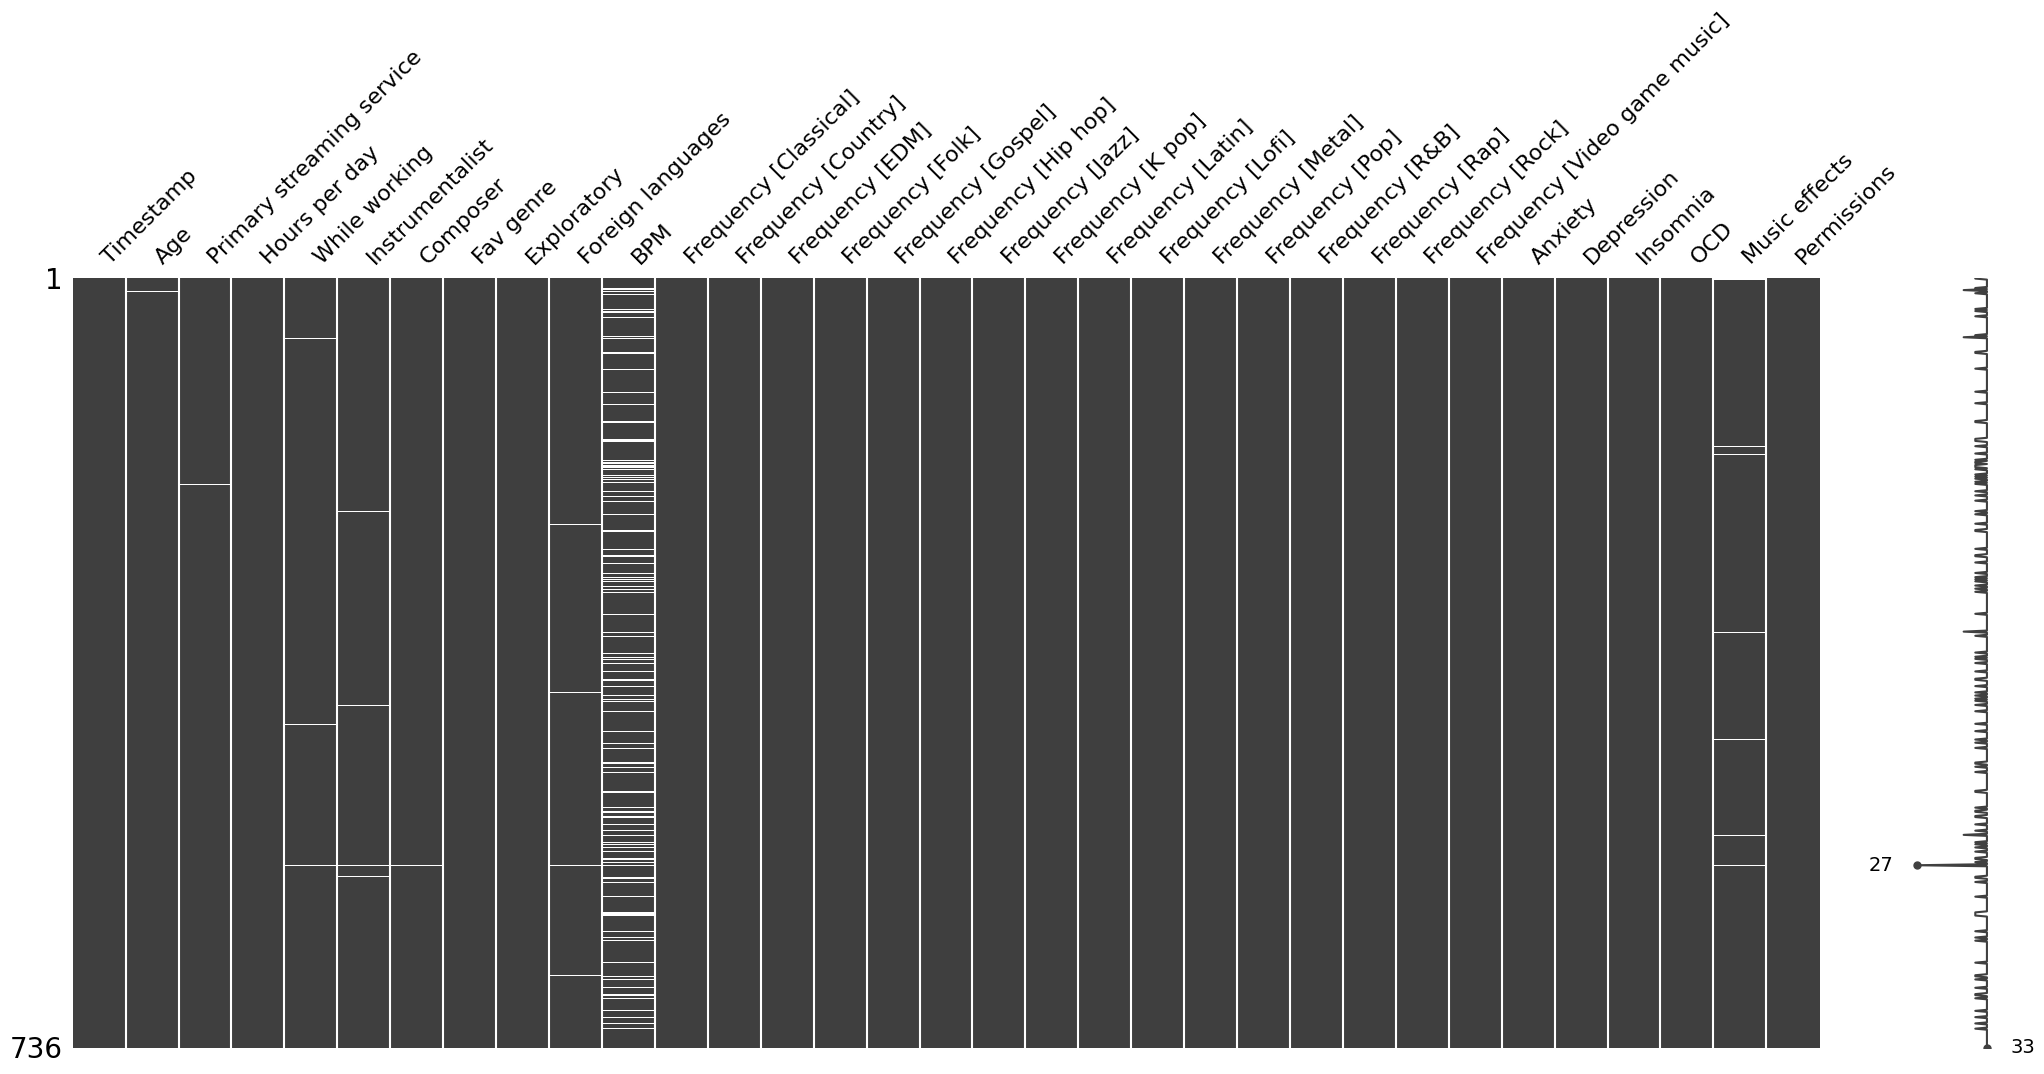

In [9]:
msno.matrix(ds)

It is important identifying the missing values to understand which rows or columns may be useful to drop or modify.
We can see that the dataset contains few missing values, so they shouldn't be a problem. However, it is clear that the column with the largest number of missing values is the one reguarding BPMs. 

### Target balance

Display in a histogram how many values are present in each class of the target column, that is *Music effects*. 

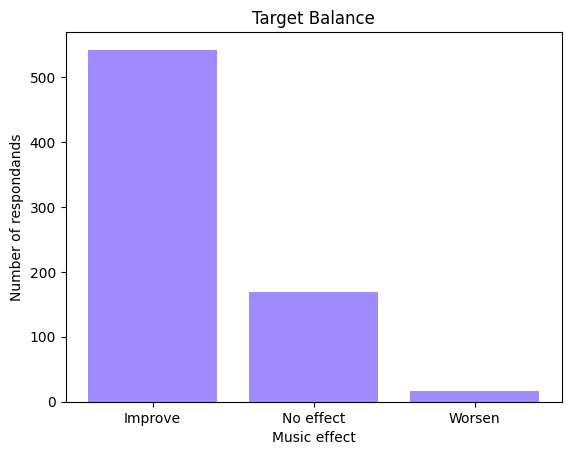

In [10]:
target_count = ds['Music effects'].value_counts()
plt.bar(target_count.index, target_count, color=['#a08aff'])
plt.title('Target Balance')
plt.ylabel('Number of respondands')
plt.xlabel('Music effect')
plt.show()

We can observe that we are dealing with a multi-class problem and that the dataset is imbalanced, since the instances for *Improve* are significantly more than the instances for *No effect*  and *Worsen*.
This means that sampling will be necessary in order to have the classes closer in number.

### Visualize the distribution of anxiety, depression, insomnia and OCD

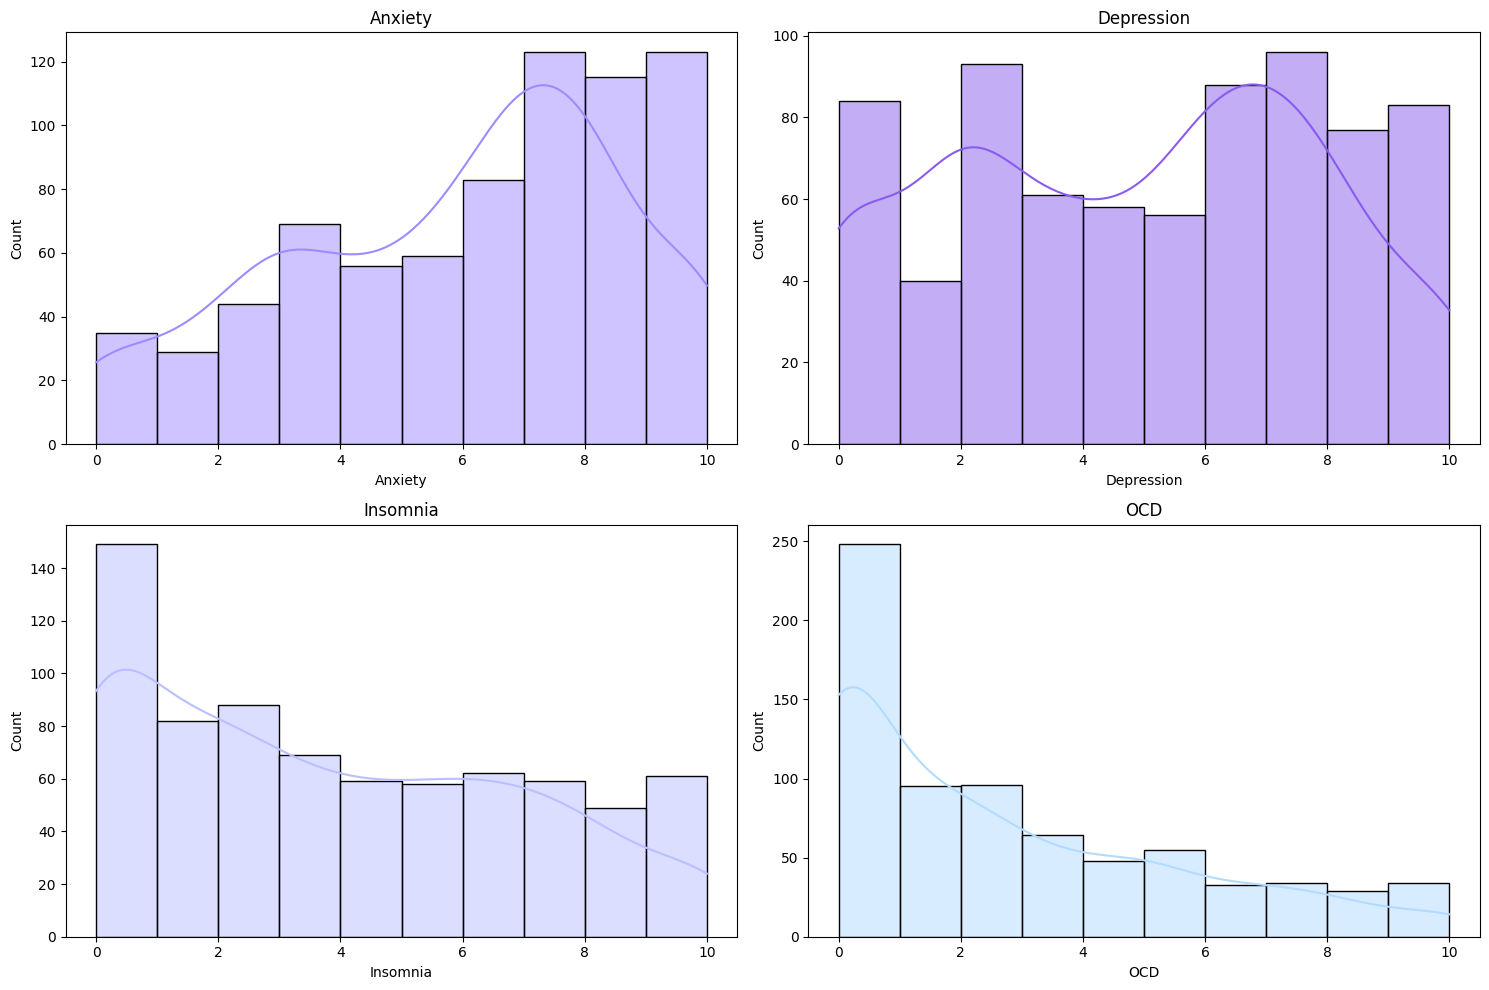

In [11]:
plt.figure(figsize=(15, 10))

# Anxiety
plt.subplot(2, 2, 1)
sns.histplot(ds['Anxiety'].dropna(), bins=10, kde=True, color='#a08aff')
plt.title('Anxiety')

# Depression
plt.subplot(2, 2, 2)
sns.histplot(ds['Depression'].dropna(), bins=10, kde=True, color='#895ced')
plt.title('Depression')

# Insomnia
plt.subplot(2, 2, 3)
sns.histplot(ds['Insomnia'].dropna(), bins=10, kde=True, color='#b9bfff')
plt.title('Insomnia')

# OCD
plt.subplot(2, 2, 4)
sns.histplot(ds['OCD'].dropna(), bins=10, kde=True, color='#b2dbff')
plt.title('OCD')

plt.tight_layout()
plt.show()


### Visualize the correlation heatmap between the mental health parameters 
A correlation heatmap describes the strenght of relationship between the variables, in this case the mental health parameters. The darker the color, the strongest the relationship between two parameters.

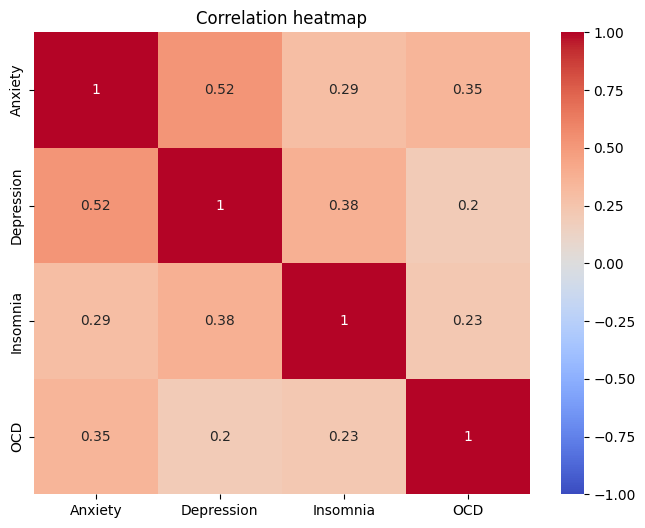

In [12]:
correlation_matrix = ds[['Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()

### Visualize the correlation between music effects and the favorite genres
We want to visualize how music effects the mental health of the respondents based on their favorite genre

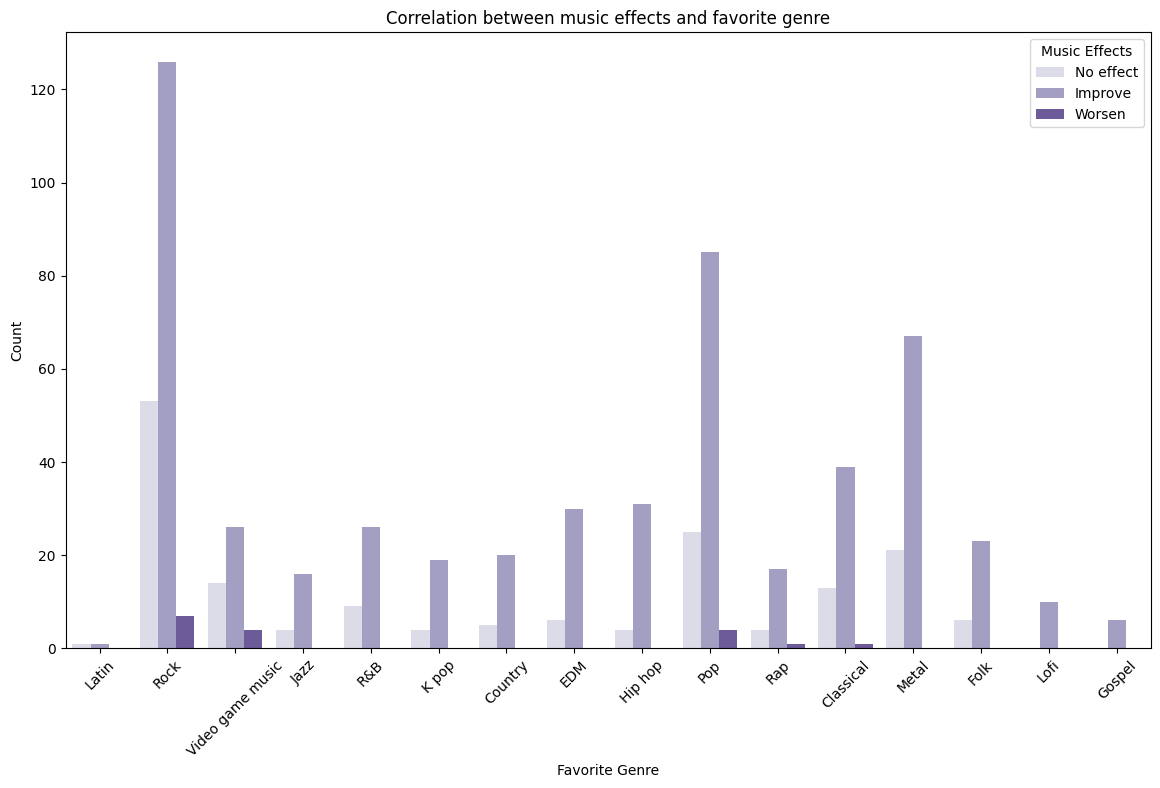

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(data=ds, x='Fav genre', hue='Music effects', palette='Purples')
plt.title('Correlation between music effects and favorite genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Music Effects')
plt.show()

# Pre-processing

Eliminate [ ] or < from the columns' name and substitute them with _.

In [14]:
#Find the columns containing [] or < in their name.
ds.columns[ds.columns.str.contains("[\[\]<]")]

Index(['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]'],
      dtype='object')

In [15]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
ds.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in ds.columns.values]
ds.columns[ds.columns.str.contains("[\[\]<]")]

Index([], dtype='object')

### Eliminate unnecessary columns
We can eliminate the columns *Time stamp*, *Primary stream service*, *Exploratory*, *Foreign languages* and *Permission* through the <code>drop</code> method.
We eliminate these columns because they don't contain meaningful information for our project.

In [16]:
ds.drop(['Timestamp', 
         'Primary streaming service', 
         'Exploratory',
         'Foreign languages',
         'Permissions'], axis=1, inplace=True)

### Outlier cleaning
We eliminate data where BPM > 250 and the Hours per day > 20 through the <code>drop</code> method. 
I decided to eliminate these data because they represent outliers, since they differentiate a lot from the rest of the data and this could impact it. 

In [17]:
ds.drop(ds[(ds['BPM'] > 250) ].index, inplace = True)
ds.drop(ds[(ds['Hours per day'] > 20) ].index, inplace = True)

### Drop NaN values in target column
Through the method <code>dropna</code> we eliminate the missing values contained in the target column, which is *'Music effect'*.

In [18]:
ds.dropna(subset=['Music effects'], axis=0, inplace=True)

## Data Transformation Pipeline
Define the Data Transformation Pipeline, this means that we want to specify which transformations we want to apply to each column, based on the features.
![](pipeline.jpg)

### Pipeline for categorical data
To define a Pipeline for categorical data:
- apply <code>SimpleImputer</code> with the strategy *most_frequent* to fill missing values.
- apply <code>OrdinalEncoder</code> to deal with ordinal features.
- apply <code>OneHotEncoder</code> to deal with nominal features.
- apply <code>MaxAbsScaler</code> to sparse normalize the features.

In [ ]:
#Pipeline to be applied to the columns While working, Instrumentalist, Composer, Frequencies
pipeline_categorical = Pipeline(steps=[
    ('null', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])


#Pipeline to be applied to the column Fav genre
pipeline_fav_genre = Pipeline(steps=[
    ('null', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(categories='auto', drop='first',handle_unknown='ignore')),
    ('max_abs', MaxAbsScaler())
])

### Pipeline for numerical columns
To define a Pipeline for numerical data:
- apply <code>SimpleImputer</code> with strategy *mean* to fill missing values.
- apply <code>KNNImputer</code> to deal with missing values. In this case we use an imputation strategy based on the idea of k-nearest neighbors.
- apply <code>MinMaxScaler</code> to normalize the features.

In [20]:
#Pipeline to be applied to the columns Anxiety, Depression, Insomnia, OCD, Hours per day, Age
pipeline_numerical = Pipeline(steps=[
    ('null', SimpleImputer(strategy='mean')),
    ('min_max', MinMaxScaler())
])

#Pipeline to be applied to the column BPM
pipeline_BPM = Pipeline(steps=[
    ('null', KNNImputer(n_neighbors=5)),
    ('min_max', MinMaxScaler())
])

### Column transformer
Define the ColumnTransformer containing all the transformations we want to apply to each column of the dataset.
In this case we use the pipelines previously defined.

In [21]:
col_transformer = ColumnTransformer(
    [
        ('numerical', pipeline_numerical, ['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']),
        ('BPM', pipeline_BPM, ['BPM']),
        ('categorical', pipeline_categorical, ['While working', 
                                               'Instrumentalist', 
                                               'Composer',
                                               'Frequency _Classical_', 
                                               'Frequency _Country_',
                                               'Frequency _EDM_',
                                               'Frequency _Folk_',
                                               'Frequency _Gospel_',
                                               'Frequency _Hip hop_',
                                               'Frequency _Jazz_',
                                               'Frequency _K pop_',
                                               'Frequency _Latin_',
                                               'Frequency _Lofi_',
                                               'Frequency _Metal_',
                                               'Frequency _Pop_',
                                               'Frequency _R&B_',
                                               'Frequency _Rap_',
                                               'Frequency _Rock_',
                                               'Frequency _Video game music_']),        
        ('fav_genre', pipeline_fav_genre, ['Fav genre']),
    ],
    verbose_feature_names_out=False, #Not include original column names and transformation details in the feature names
    sparse_threshold=0,              #Represent the transformed data in sparse format, regardless of its density
    remainder='passthrough'          #All the columns that are not specified above are left unmodified
)

col_transformer  #visualize the ColumnTransformer

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('numerical',
                                 Pipeline(steps=[('null', SimpleImputer()),
                                                 ('min_max', MinMaxScaler())]),
                                 ['Age', 'Hours per day', 'Anxiety',
                                  'Depression', 'Insomnia', 'OCD']),
                                ('BPM',
                                 Pipeline(steps=[('null', KNNImputer()),
                                                 ('min_max', MinMaxScaler())]),
                                 ['BPM']),
                                ('categorical',
                                 Pipeline(steps=[('null',
                                                  SimpleI...
                                  'Frequency _Lofi_', 'Frequency _Metal_',
                                  'Frequency _Pop_', 'Frequency _R&B_',
                                  'Frequency _Rap_', 'Frequency _Rock_',
                                  'Frequency _Video game music_']),
                                ('fav_genre',
                                 Pipeline(steps=[('null',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore')),
                                                 ('max_abs', MaxAbsScaler())]),
                                 ['Fav genre'])],
                  verbose_feature_names_out=False)

Apply the ColumnTransformer with the <code>fit</code> method to the original dataset, visualize the clean dataset and get information about it.

In [ ]:
col_transformer.fit(ds)
dataset = pd.DataFrame(col_transformer.transform(ds), columns=col_transformer.get_feature_names_out())
dataset

,Age,Hours per day,Anxiety,Depression,Insomnia,OCD,BPM,While working,Instrumentalist,Composer,...,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,Music effects
0,0.114286,0.2,0.7,0.7,1.0,0.2,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No effect
1,0.728571,0.125,0.9,0.7,0.3,0.3,0.381818,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Improve
2,0.114286,0.2,0.7,0.2,0.5,0.9,0.486364,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Improve
3,0.114286,0.25,0.8,0.8,0.7,0.7,0.390909,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Improve
4,0.114286,0.15,0.4,0.8,0.6,0.0,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,0.1,0.1,0.7,0.6,0.0,0.9,0.545455,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Improve
719,0.114286,0.05,0.3,0.2,0.2,0.5,0.727273,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Improve
720,0.128571,0.3,0.2,0.2,0.2,0.2,0.545455,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Improve
721,0.128571,0.25,0.2,0.3,0.2,0.1,0.772727,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Improve


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           723 non-null    object
 1   Hours per day                 723 non-null    object
 2   Anxiety                       723 non-null    object
 3   Depression                    723 non-null    object
 4   Insomnia                      723 non-null    object
 5   OCD                           723 non-null    object
 6   BPM                           723 non-null    object
 7   While working                 723 non-null    object
 8   Instrumentalist               723 non-null    object
 9   Composer                      723 non-null    object
 10  Frequency _Classical_         723 non-null    object
 11  Frequency _Country_           723 non-null    object
 12  Frequency _EDM_               723 non-null    object
 13  Frequency _Folk_    

In [24]:
dataset.isnull().sum(axis=0)/ds.shape[0]*100

Age                             0.0
Hours per day                   0.0
Anxiety                         0.0
Depression                      0.0
Insomnia                        0.0
OCD                             0.0
BPM                             0.0
While working                   0.0
Instrumentalist                 0.0
Composer                        0.0
Frequency _Classical_           0.0
Frequency _Country_             0.0
Frequency _EDM_                 0.0
Frequency _Folk_                0.0
Frequency _Gospel_              0.0
Frequency _Hip hop_             0.0
Frequency _Jazz_                0.0
Frequency _K pop_               0.0
Frequency _Latin_               0.0
Frequency _Lofi_                0.0
Frequency _Metal_               0.0
Frequency _Pop_                 0.0
Frequency _R&B_                 0.0
Frequency _Rap_                 0.0
Frequency _Rock_                0.0
Frequency _Video game music_    0.0
Fav genre_Country               0.0
Fav genre_EDM               

We can observe that, after cleaning the data through the ColumnTransformer, there are no missing values in the dataset and all the columns are now in the form float64. So, we are now ready to train the dataset.

# Training and test sets
Split the entire dataset into train and test sets. 
The splitting is done through the <code>train_test_split()</code> method and specifing the size of the test through <code>test_size</code>, in this case I set it at 0.13, so that the test set will be 13% of the whole dataset and the training set the 87%.
We do so beacuse the test set simulate unseen data and, at the end, we can evaluate the best model on the test set to check overfitting and to analyze the sensitivity of the model.

In [25]:
#Separate the target column ('Music effects') from the feature matrix

X = ds.drop('Music effects', axis=1)
y = ds['Music effects']

In [26]:
#Divide the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X,                    #Input data
    y,                    #Target variable
    test_size=0.13,       #Size of the test set
    stratify = y,         #The class distribution in y is maintained in both test and train sets
    shuffle=True,         #Shuffle the data before splitting
    random_state=30       #Controls the shuffle
    )

# Model selection
Through model selection we identify the most performant algorithm (also called *best model*) among different classifiers. 
The most performant algorithm is identified with Cross Validation, then we retrain it on the entire training set and finally evaluate it on the test dataset.


Firstly, define a IMBPipeline and apply it to *X_train* and *y_train*, we do so by using:
- *sampler*: a method used to balance imbalanced classes. 
- *dim_reduction*: process used to reduce the number of features or dimensions in the dataset. It is used to simplify the data and remove features that are irrelevant.
- *classifier*: model used to predict categorical labels or classes for an input.

In [27]:
model_pipeline = IMBPipeline(steps=[
    ('transformation', col_transformer),      #as transformations, use the column transformerd defined above
    ('sampler', SMOTE()),                     #as sampler, use SMOTE
    ('dim_reduction', PCA(n_components=0.8)), #as dimensionality reduction, use PCA
    ('classifier', DecisionTreeClassifier())  #as classifier, use DecisionTreeClassfier
])

model_pipeline.fit(X_train,y_train) #fit the pipeline on X_train and y_train

Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Hours per day',
                                                   'Anxiety', 'Depression',
                                                   'Insomnia', 'OCD']),
                                                 ('BPM',
                                                  Pipeline(steps=[('null',
                                                                   KNNImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['BPM']),
                                                 ('categorica...
                                                   'Frequency _Video game '
                                                   'music_']),
                                                 ('fav_genre',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('max_abs',
                                                                   MaxAbsScaler())]),
                                                  ['Fav genre'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', DecisionTreeClassifier())])

## Configurations
Define the **samplers' configuration** dictionary and include:
- <code>SMOTE</code>: SMOTE generates synthetic samples of the minority classes by crating new instances that are interpolations of existing instances of the minority classes.
- <code>RandomOverSampler</code>: RandomOverSampler oversamples the minority classes by duplicationg existing samples of the minority classes at random.


In [28]:
sampler_configurations = [
    {
        'sampler':[None]
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority']
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority']
    }
]

Define the **dimensionality reduction's configuration** dictionary and include:
- <code>LDA</code>: Linear Discriminant Analysis is a supervised method for dimensionality reduction (it takes into account the class labels) that aims to find a subspace that optimizes the classes separability and minimizes the variance within each class.
- <code>PCA</code>: Principal Component Analysis is an unsupervised linear transformation technique based on the correlation between features that aims to find the direction of maximum variance and project the data onto a new lower dimensional space.

In [29]:
dim_reduction_configurations = [
    {
        'dim_reduction': [None]
    },
  {
        'dim_reduction': [LinearDiscriminantAnalysis()]
    },
    {
        'dim_reduction': [PCA()]
    }
]

Define the **classifiers' configuartion** dictionary, in which we include the following classifiers:
#### KNeighborsClassifier
KNeighborsClassifier is an instance-based classifier that, given an unseen data point, finds the *k* nearest points and returns the majority class. The majority class is given by the distance between the unseen point and the other points in the set.
#### RandomForestClassifier 
RandomForestClassifier is an ensemble method of decision trees via bagging. It averages multiple deep decision trees to build a stronger model.
#### DecisionTreeClassifier
DecisionTreeClassifier recursively partitions the feature space by deciding to which class an element belongs.
#### Support Vector Machines (SVM)
SVM is a model able to find optimal decision buondaries to optimize the space between the classes.
#### VotingClassifier
VotingClassifier is an ensemble method where different classifiers are combined into a meta-classifier with better performance.
The predictions of the classifiers are combined in two ways:
1. taking the majority voting, which is called *hard voting*
2. taking the weighted average, which is called *soft voting*
#### BaggingClassifier
BaggingClassifier is an enemble method that trains different classifiers on different boostrap samples (random subsets of the training dataset, drawn with replacement) and then aggregate their individual predictions (by voting or averaging) to select the most predicted one, that will be the final prediction.
#### Adaptive Boosting (ADABoostClassifier)
ADABoostClassifier is an ensemble method that uses weak learners by combining their predictions to get a stronger model.
#### OneVsRestClassifier
OneVsRestClassifier is used to deal with multiclass problems and it fits one classifier per class and then, for each classifer, the class is fitted against all the other classes.
#### OneVsOneClassifier
OneVsOneClassifier is used to deal with multiclass problems and it fits one classifier for each pair of classes and given a new instance, it selects the class associated to the predictor that received the most votes.

In [30]:
classifier_configurations = [

    #KNeighborsClassifier
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors':[3, 5, 7, 9],          #Number of neighbors considered when making predictions
        'classifier__weights':['uniform', 'distance'],   #How the contributions of neighbors are weighted
        'classifier__metric':['minkowski'],              #Metric to use for distance computation
        'classifier__p':[1, 2, 3, 4],                    #Power parameter for the Minkowski metric
        'classifier__algorithm':['ball_tree', 'kd_tree'] #Algorithm used to compute the nearest neighbors
    },

    #RandomForestClassifier
    {
        'classifier':[RandomForestClassifier()],
        'classifier__n_estimators':[10, 50, 100],      #Number of trees in the forest
        'classifier__max_depth':[None, 1, 2, 3],       #Maximum depth of the tree 
        'classifier__min_samples_split':[2, 5, 10],    #Minumum number of samples required to split an internal node
        'classifier__min_samples_leaf':[1, 2, 4],      #Minumum number of samples required to be at a leaf node
        'classifier__max_features':[None, 1, 2, 3],    #Number of features to consider when looking for the best split
        'classifier__bootstrap':[True, False],         #Whether bootstrap samples are used when building trees
        'classifier__random_state':[42]                #Controls randomness of the bootstrapping and the sampling
    }, 

    #DecisionTreeClassifier
    {
        'classifier':[DecisionTreeClassifier()], 
        'classifier__criterion':['entropy', 'gini'],        #Function to measure the quality of the split
        'classifier__max_depth':[None, 1, 2, 3],            #Maximum depth of the tree
        'classifier__min_samples_split':[2, 5, 10],         #Minimum number of samples required to split an internal node
        'classifier__min_samples_leaf':[1, 2, 4],           #Minimum number of instances a leaf node must have
        'classifier__max_features':[None, 'sqrt', 'log2'],  #Maximum number of features to be evaluated for the best split
        'classifier__random_state':[42]                     #Controls the randomness of the estimator
    },

    #SVM
    {
        'classifier':[SVC()],
        'classifier__C': [0.1, 1, 10],                       #Regularization parameter
        'classifier__kernel': ['linear', 'rbf', 'poly'],     #Specifies the type of kernel used in the SVM algorithm
        'classifier__gamma': ['scale', 'auto', 0.1, 1],      #Karnel coefficient for 'rbf', 'poly'
        'classifier__decision_function_shape':['ovo', 'ovr'] #For multiclass classification 
    },

    #Voting Classifier
    {
        'classifier':[VotingClassifier(estimators=[                               #Fit clones of those original estimators
            ('knn', KNeighborsClassifier(n_neighbors= 5,metric='minkowski',p=1)),
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('dt', DecisionTreeClassifier(random_state= 42)),
            ('SVM', SVC(kernel='linear', C=1.0))])],
        'classifier__voting':['hard']                                             #Hard voting uses predicted class labels for majority rule voting
    },

    #BaggingClassifier
    {
        'classifier':[BaggingClassifier()],
        'classifier__base_estimator':[                                    #Base estimator to fit on random subsets of the dataset
            KNeighborsClassifier(n_neighbors= 5,metric='minkowski',p=1),
            RandomForestClassifier(n_estimators=100, random_state=42),
            DecisionTreeClassifier(random_state= 42),
            SVC(kernel='linear', C=1.0)],
        'classifier__n_estimators':[10, 50, 100],                         #Number of base estimators in the ensemble
        'classifier__max_samples':[1.0],                                  #Number of samples to train each base estimator
        'classifier__max_features': [1.0],                                #Number of features to train each base estimator
        'classifier__bootstrap':[True],                                   #Whether samples are drawn with replacement
        'classifier__n_jobs':[-1]                                         #Number of jobs to run in parallel for both fit and predict
    },

     #ADABoostClassifier
    {
        'classifier':[AdaBoostClassifier()],
        'classifier__base_estimator':[                                   #Base estimator from which the boosted ensemble is built
            RandomForestClassifier(n_estimators=100, random_state=42),
            DecisionTreeClassifier(random_state= 42),
            SVC(kernel='linear', C=1.0)],
        'classifier__n_estimators':[10, 50, 100],                        #Maximum number of estimators at which boosting is terminated
        'classifier__learning_rate':[0.01, 0.1],                         #Weight applied to each classifier at each boosting iteration
        'classifier__algorithm':['SAMME']                                #The algorithm applied
    },

    #OneVsRestClassifier
    {
        'classifier':[OneVsRestClassifier(RandomForestClassifier())],  
        'classifier__estimator' : [
            KNeighborsClassifier(),
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            SVC()
        ]
    },

    #OneVsOneClassifier
    {
        'classifier':[OneVsOneClassifier(RandomForestClassifier())],  
        'classifier__estimator' : [
            KNeighborsClassifier(),
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            SVC()
        ]
    }
]

Set all the configurations dictionaries possible combiations through <code>itertools.product</code>. That is all the configurations between samplers, dimensionality reduction and classifier configurations defined above.

In [31]:
all_configurations = [dict(
    itertools.chain(*(e.items() for e in configuration))) 
    for configuration in itertools.product(
        sampler_configurations, 
        dim_reduction_configurations, 
        classifier_configurations)]

Visualize how many the possible combinations are.

In [32]:
f'Number of all possible configurations: {len(all_configurations)}'

'Number of all possible configurations: 81'

We observe that there are 81 possible configuarations.

## Model selection with Nested Cross-Validation
Nested cross-validation is useful to find the best configuration among different ML algorithms. It is composed by:
- **Inner loop**: use <code>RandomizedSearchCV</code> for hyperparameter optimization.
- **Outer loop**: use <code>cross_validate</code> with the best candidate identified in the inner loop as hyperparameter.

Firstly, define the inner loop using <code>RandomizedSearchCV</code> that considers the list of all the configurations, it uses a 2-fold cross-vaidation and F1_micro as scoring method.
Since we are deling with a multi-class problem, we need to change the average parameter of F1 from ' binary' (which is the default) and we do so by specifying 'f1_micro'.

In [33]:
#Inner loop
randomized_search = RandomizedSearchCV(
    estimator = model_pipeline,                #Sample pipeline
    param_distributions = all_configurations,  #Parameters to be used
    n_iter = 240,                              #Number of iterations
    cv = 2,                                    #2-fold cross-validation
    scoring = 'f1_micro',                      #Scoring metric for evaluation
    error_score = 'raise',                     #Display errors
    refit = True,                              #Refit the best estimator 
    n_jobs = -1                                #Number of jobs to run in parallel 
)

Then, define the outer loop using <code>cross_validate</code>, which returns the best model for each fold iteration. Set a 5-fold cross-validation and as scoring method provide a list containing 'f1_weighted', 'f1_micro', 'f1_macro' and 'accuracy' so that we can see which is the best performing method.

In [34]:
#Outer loop
scores = cross_validate(
    estimator = randomized_search,                                 #The estimator we found
    X = X_train,                                                   #Train set
    y = y_train,                                                   #Target train set
    cv = 5,                                                        #5-fold cross validation 
    scoring = ['f1_weighted', 'f1_micro', 'f1_macro', 'accuracy'], #Targt scoring
    return_estimator = True,                                       #Get best estimator for each fold
    error_score = 'raise',                                         #Display errors
    verbose = 3,                                                   #Display the output
    n_jobs = -1                                                    #Number of jobs to run in parallel
)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END  accuracy: (test=0.667) f1_macro: (test=0.309) f1_micro: (test=0.667) f1_weighted: (test=0.623) total time= 2.5min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s
[CV] END  accuracy: (test=0.754) f1_macro: (test=0.308) f1_micro: (test=0.754) f1_weighted: (test=0.656) total time= 2.2min
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s
[CV] END  accuracy: (test=0.730) f1_macro: (test=0.281) f1_micro: (test=0.730) f1_weighted: (test=0.630) total time= 1.9min
[CV] END  accuracy: (test=0.730) f1_macro: (test=0.281) f1_micro: (test=0.730) f1_weighted: (test=0.630) total time= 3.1min
[CV] END  accuracy: (test=0.736) f1_macro: (test=0.283) f1_micro: (test=0.736) f1_weighted: (test=0.631) total time= 2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.0min finished


By the output of the cross validation, we can observe that the best scoring methods for this multi-class problem are f1_micro and accuracy, since their scores are higher than the ones of f1_weighed and f1_macro. For this reason, from now on I decided to apply f1_micro.

Create a loop that, for each estimator, fits the best model on the entire training set and then returns the F1 score (with micro average) for both the training and the test sets.

In [35]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train, average = 'micro')
    f1_test = f1_score(y_test, pred_test, average = 'micro')

    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.7472178060413355, F1 on test set:0.6595744680851063
F1 on training set:0.8139904610492846, F1 on test set:0.7446808510638298
F1 on training set:0.8521462639109698, F1 on test set:0.7446808510638298
F1 on training set:0.78060413354531, F1 on test set:0.7127659574468085
F1 on training set:0.7551669316375199, F1 on test set:0.7446808510638298


Get the best estimator through the <code>best_estimator_</code> method.

In [36]:
estimator.best_estimator_

Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Hours per day',
                                                   'Anxiety', 'Depression',
                                                   'Insomnia', 'OCD']),
                                                 ('BPM',
                                                  Pipeline(steps=[('null',
                                                                   KNNImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['BPM']),
                                                 ('categorica...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('max_abs',
                                                                   MaxAbsScaler())]),
                                                  ['Fav genre'])],
                                   verbose_feature_names_out=False)),
                ('sampler', None), ('dim_reduction', None),
                ('classifier',
                 RandomForestClassifier(max_depth=3, max_features=None,
                                        min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=50,
                                        random_state=42))])

We want to get the parameters of the best estimator. We can do so by using the <code>get_params()</code> method.

In [37]:
best_classifier = estimator.best_estimator_.get_params()['classifier']
best_classifier

RandomForestClassifier(max_depth=3, max_features=None, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50, random_state=42)

We can observe that the best model uses *RandomForestClassifier*.

# Refinement of the selected model

Now that we have selected the best candidate model, we tune the hyperparameters and refit the model on the entire dataset.
Firstly, define the pipeline for the selected model.

In [72]:
best_model_pipeline = IMBPipeline([
    ('trans', col_transformer),                      #The transformation is given by the column transformer
    ('classifier', RandomForestClassifier(           #Classifier is given by RandomForestClassifier
        max_depth=3,
        max_features=None,
        min_samples_leaf=4,
        min_samples_split=10,
        n_estimators=50,
        random_state=42))
])

Set the parameter distributions and then, to identify the best configuaration for the pipeline,  define a *RandomizedSerachCV*.

In [52]:
parameters = {
    'classifier__n_estimators':[10, 50, 100],
    'classifier__max_depth' : [None, 1, 3, 5],
    'classifier__min_samples_split' : [2, 5, 7],
    'classifier__min_samples_leaf' : [1, 3, 5]
}

best_rs = RandomizedSearchCV(
    estimator = best_model_pipeline,                         #Pipeline for the best model
    param_distributions = parameters,                        #Parameters to be used
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),   #Use RepeatedStratifiedKFold as Cross Validation
    n_iter = 20,                                             #Number of iterations
    scoring = 'f1_micro',                                    #Scoring method for evaluation
    refit = True,                                            #Refit the best estimator
    error_score = 'raise',                                   #Display errors
    n_jobs = -1                                              #Number of jobs to run in parallel
)

Run the <code>fit</code> method to fit the dataset with the best estimator.

In [53]:
best_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   error_score='raise',
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('numerical',
                                                                               Pipeline(steps=[('null',
                                                                                                SimpleImputer()),
                                                                                               ('min_max',
                                                                                                MinMaxScaler())]),
                                                                               ['Age',
                                                                                'Hours '
                                                                                'per '
                                                                                'day',
                                                                                'Anxiety',
                                                                                'Depression',
                                                                                '...
                                             ('classifier',
                                              RandomForestClassifier(max_depth=3,
                                                                     max_features=None,
                                                                     min_samples_leaf=4,
                                                                     min_samples_split=10,
                                                                     n_estimators=50,
                                                                     random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 1, 3,
                                                                  5],
                                        'classifier__min_samples_leaf': [1, 3,
                                                                         5],
                                        'classifier__min_samples_split': [2, 5,
                                                                          7],
                                        'classifier__n_estimators': [10, 50,
                                                                     100]},
                   scoring='f1_micro')

Display the best estimator obtained after tuning and random search.

In [54]:
best_estimator = best_rs.best_estimator_
best_estimator

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Hours per day',
                                                   'Anxiety', 'Depression',
                                                   'Insomnia', 'OCD']),
                                                 ('BPM',
                                                  Pipeline(steps=[('null',
                                                                   KNNImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['BPM']),
                                                 ('categorical',
                                                  Pipeli...
                                                   'music_']),
                                                 ('fav_genre',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('max_abs',
                                                                   MaxAbsScaler())]),
                                                  ['Fav genre'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(max_features=None, min_samples_leaf=5,
                                        min_samples_split=5,
                                        random_state=42))])

# Evaluation

During evaluation we want ot understand how the model performs on unseen data, which is represented by the test set.
We will evaluate the performance of the model using different methods such as f1, recall, precision and accuracy and then we will identify overfitting and underfitting through the learning and valdation curves.

#### F1 score
Compute the F1 score on the test set with micro average. 

In [55]:
f1_score(y_test, best_estimator.predict(X_test), average='micro')

0.7446808510638298

#### Recall score
Compute the recall score on the test set with micro average.

In [56]:
recall_score(y_test, best_estimator.predict(X_test), average='micro')

0.7446808510638298

#### Precision score
Compute the precision score on the test set with micro average.

In [57]:
precision_score(y_test, best_estimator.predict(X_test), average='micro')

0.7446808510638298

#### Accuracy score
Compute the accuracy score on the test set.

In [58]:
accuracy_score(y_test, best_estimator.predict(X_test))

0.7446808510638298

Now we can visualize the Learning Curve and the Validation Curve, which are useful tools for identifying overfitting and underfitting.


#### Learning curve
With the Learning curve we can represent the F1-score of the model on the training and validation sets as a function of the size of the training set. 

In [59]:
train_sizes, train_scores, test_scores = learning_curve(best_estimator,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1_micro',
                                                       shuffle = False)

(0.6, 1.03)

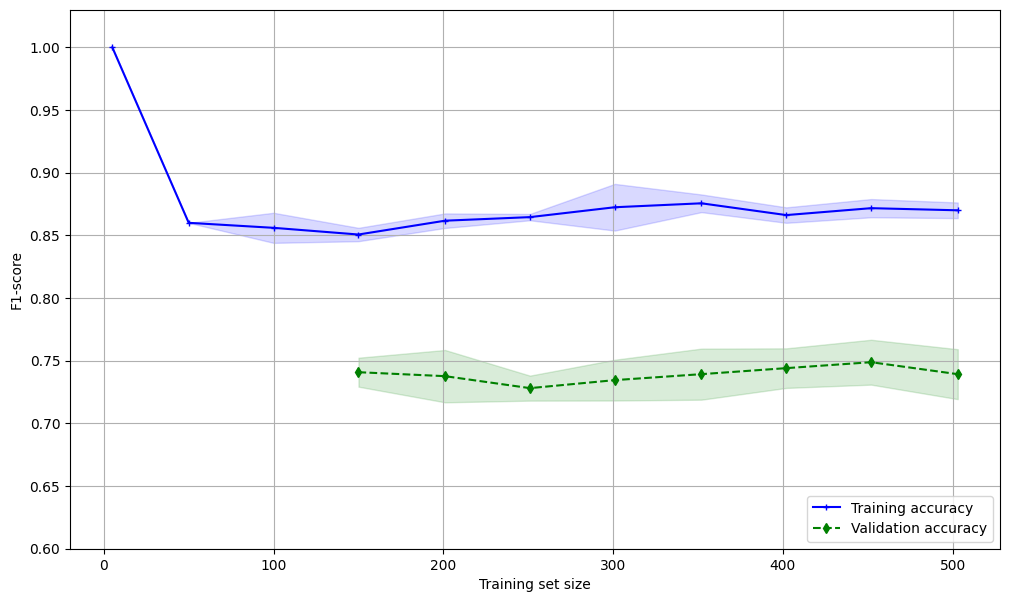

In [60]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

From the learning curve we can deduct that the model is overfitted.
- We can see that the model is perfectly fitting on small training set, but as the size of training set increases and the model starts to fit noise, the training accuracy descreses until it stabilizes. This means that the model is becoming less able to generalize unseen data. 
- We can observe that the validation accuracy remains relatively stable as the training size increases and that the validation accuracy is lower than the training accuracy, which suggests that the model is overfitted.  
Since the two accuracies are converging, we can predict that they will become closer if we were to add more data.

#### Validation curve
The validation curve is an useful tool to identify underfitting or overfitting as a function of a chosen parameter with respect to the used classifier.
I chose to visualize the validation curve as a function of n_estimator.

In [61]:
range_n_estimators = [10, 50, 100, 500, 1000, 1400]
train_scores, test_scores = validation_curve(
        best_estimator,
        X=X_train, 
        y=y_train, 
        param_range=range_n_estimators, 
        param_name='classifier__n_estimators',
        scoring='f1_micro',
        cv=5, 
        n_jobs=-1 
)

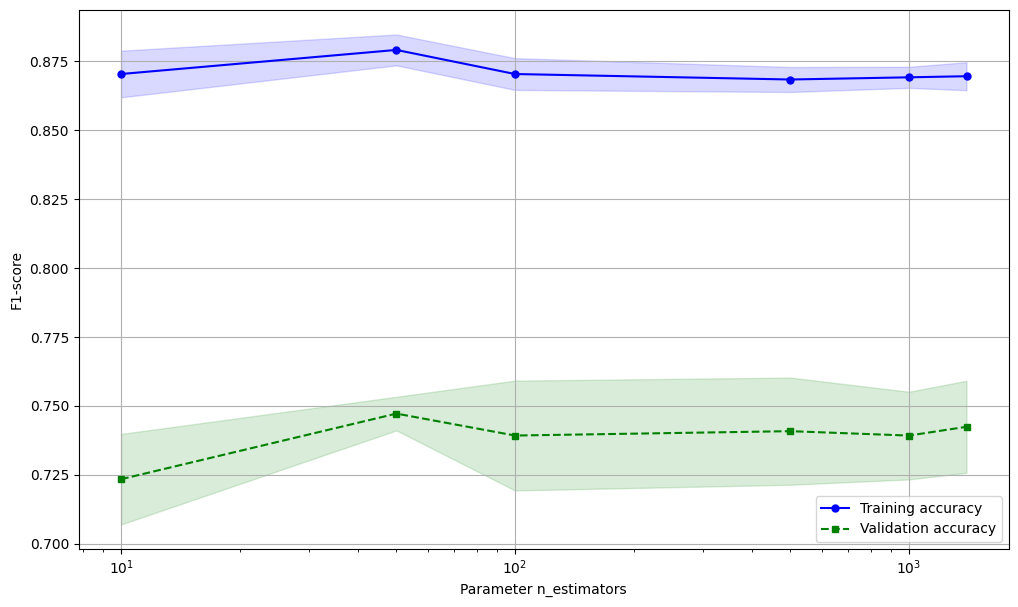

In [62]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_n_estimators, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_n_estimators,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_n_estimators, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_n_estimators,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter n_estimators')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_xscale('log')


From the validation curve we can observe that the training accuracy remains quite satable across all values of n_estimators, suggesting that the model is learning well from the training data.
The validation accuracy improves as n_estimators increases, up to a point where it starts to decrease to then stabilize. This means that initially the model is decresing bias, but as the model becomes more complex, it starts to overfit.
The validation curve suggests that the optimal n_estimators in the range where the validation curve is highest, before it starts to decline.

# Conclusion
In the project we aimed to predict whether music has positive, negative or doesn't have impacts on the mental health. We did so by using machine learning techniques and then we evaluated metrics, such as F1, and monitored overfitting/underfitting to understand how good the model is. From the results of the model we can conclude that there is a strong correlation between music preferences and reported mental health.
For further researches we could enrich the data with a larger sample to improve generalization and, consequentially, increase the model's performances.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=539aa536-0d42-4e11-bd2f-7fdd2c003fc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>